## Вступление

Эта работа посвящена рассмотрению понятия асимптотической сложности алгоритмов на конкретных примерах. Грубо говоря, асимптотическая сложность алгоритма — это количество операций, из которых этот алгоритм состоит. В ходе работы вы напишете несколько различных алгоритмов, которые в силу различной вычислительной сложности будут выполняться за разное количество времени.


## Начало работы

Эта работа выполняется при помощи **Jupyter Notebook** — интерактивной «тетрадки», которая позволяет хранить текст, код, графики и т.д.

Первым делом подключим необходимые нам модули:

In [1]:
import util
import matplotlib
import random
import math
%matplotlib inline

Мы не будем детально останавливаться на том, за что именно отвечают эти модули, поскольку к самой работе это имеет весьма опосредованное отношение.

# Задача «для разогрева»

### Задание №1: числа Фибоначчи

Напишите рекурсивную реализацию функции, вычисляющей числа Фибоначчи. Для этого допишите тело функции ниже:

In [2]:
def recursive_fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    return recursive_fib(n - 2) + recursive_fib(n - 1)

Проверьте, что функция работает корректно:

In [3]:
assert recursive_fib(0) == 0
assert recursive_fib(1) == 1
assert recursive_fib(9) == 34

Теперь напишите рекурсивную реализацию, но с использованием дополнительного массива в роли кэша, в котором хранятся уже вычисленные значения:

In [4]:
def recursive_fib_with_cache(n, cache=None):
    cache = cache or [0, 1] + [0] * (n - 1)
    if n == 0:
        return 0
    elif n == 1:
        return 1
    cache[n] = recursive_fib_with_cache(n - 2, cache) + recursive_fib_with_cache(n - 1, cache)
    return cache[n]

Убедитесь, что функция работает корректно:

In [5]:
assert recursive_fib_with_cache(0) == 0
assert recursive_fib_with_cache(1) == 1
assert recursive_fib_with_cache(9) == 34

И, наконец, напишите нерекурсивную реализацию функции:

In [6]:
def fib(n):
    f = [0, 1]
    for i in range(n):
        f[0], f[1] = f[1], f[0] + f[1]
    return f[0]

Проверьте правильность реализации:

In [7]:
assert fib(0) == 0
assert fib(1) == 1
assert fib(9) == 34

А теперь давайте посмотрим на скорость работы написанных выше функций:

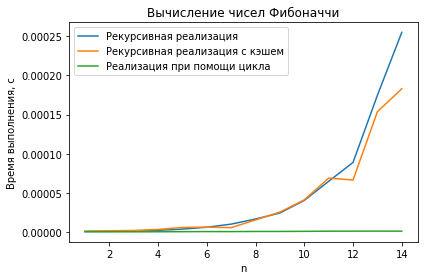

In [8]:
util.plot_fib_results(
    ('Рекурсивная реализация', recursive_fib),
    ('Рекурсивная реализация с кэшем', recursive_fib_with_cache),
    ('Реализация при помощи цикла', fib)
)

Можно видеть, что самой быстрой является реализация при помощи цикла.
**Вопрос**: какова асимптотическая сложность реализованных алгоритмов?

# Сортировки

Здесь и далее мы предполагаем, что все функции сортировки упорядочивают исходный массив по возрастания. Функции сортировки в этой работе должны изменять переданный массив, а не возвращать новый.

### Задание №2: сортировка пузырьком

Напишите обычную реализацию сортировки пузырьком:

In [9]:
def bubble_sort(a):
    for i in range(len(a)):
        for j in range(len(a) - i - 1):
            if a[j] > a[j + 1]:
                a[j], a[j + 1] = a[j + 1], a[j]
        

Убедитесь, что сортировка написана верно:

In [10]:
a = [5, 4, 3, 2, 1]
bubble_sort(a)
assert util.is_sorted(a)

Особенность обычной реализации пузырьковой сортировки состоит в том, что она «не замечает» отсортированности массива. Это означает, что даже если массив уже отсортирован, алгоритм всё равно будет выполнен от начала и до конца. Чтобы этого избежать, можно добавить специальный флаг, показывающий, была ли за прошлый проход выполнена хоть одна перестановка. Если перестановок не было, значит, массив уже отстортирован. Напишите улучшенную реализацию сортировки пузырьком:

In [11]:
def bubble_sort_adaptive(a):
    flag = True
    for i in range(len(a)):
        for j in range(len(a) - i - 1):
            if a[j] > a[j + 1]:
                a[j], a[j + 1] = a[j + 1], a[j]
                flag = False
        if flag:
            break
        flag = True

Проверьте свою реализацию:

In [12]:
a = [5, 4, 3, 2, 1]
bubble_sort_adaptive(a)
assert util.is_sorted(a)

А теперь сравните скорость работы двух реализаций одного алгоритма при различных входных данных:

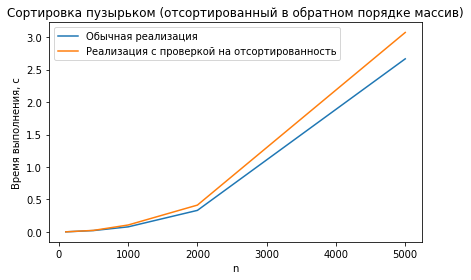

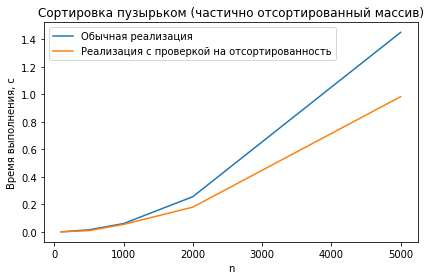

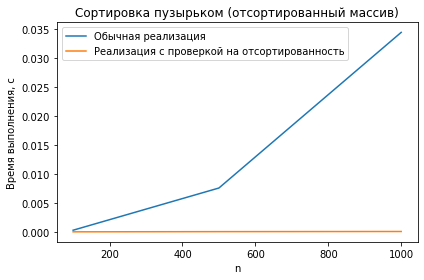

In [13]:
util.plot_bubble_sort_results(
    ('Обычная реализация', bubble_sort),
    ('Реализация с проверкой на отсортированность', bubble_sort_adaptive)
)

**Вопрос**: какие выводы можно сделать из полученных результатов?

### Задание №3: быстрая сортировка

Напишите реализацию быстрой сортировки, использую первый элемент в качестве опорного.

In [14]:
def quick_sort_first(a, l=None, r=None):
    if l is None:
        l = 0
    if r is None:
        r = len(a) - 1
    if l >= r:
        return
    i = l
    j = r
    pivot = a[l]
    while i < j:
        while a[i] < pivot:
            i += 1
        while a[j] > pivot:
            j -= 1
        if i <= j:
            a[i], a[j] = a[j], a[i]
            i += 1
            j -= 1
    quick_sort_first(a, l, j)
    quick_sort_first(a, i, r)
        

Проверьте свою реализацию:

In [15]:
a = [5, 4, 3, 2, 1]
quick_sort_first(a)
assert util.is_sorted(a)

Как вы знаете, скорость работы алгоритма быстрой сортировки напрямую зависит от способа выбора опорного элемента. Поэтому реализуем ещё два варианта. Сначала будем выбирать в качестве опорного элемента средний:

In [16]:
def quick_sort_middle(a, l=None, r=None):
    if l is None:
        l = 0
    if r is None:
        r = len(a) - 1
    if l >= r:
        return
    i = l
    j = r
    pivot = a[(l + r) // 2]
    while i < j:
        while a[i] < pivot:
            i += 1
        while a[j] > pivot:
            j -= 1
        if i <= j:
            a[i], a[j] = a[j], a[i]
            i += 1
            j -= 1
    quick_sort_middle(a, l, j)
    quick_sort_middle(a, i, r)

Проверяем реализацию:

In [17]:
a = [5, 4, 3, 2, 1]
quick_sort_middle(a)
assert util.is_sorted(a)

А теперь в качестве опорного элемента выбираем произвольный элемент (при помощи вызова `random.choice(a)`):

In [18]:
def quick_sort_random(a, l=None, r=None):
    if l is None:
        l = 0
    if r is None:
        r = len(a) - 1
    if l >= r:
        return
    i = l
    j = r
    pivot = random.choice(a)
    while i < j:
        while a[i] < pivot:
            i += 1
        while a[j] > pivot:
            j -= 1
        if i <= j:
            a[i], a[j] = a[j], a[i]
            i += 1
            j -= 1
    quick_sort_middle(a, l, j)
    quick_sort_middle(a, i, r)

Проверяем реализацию:

In [19]:
a = [5, 4, 3, 2, 1]
quick_sort_random(a)
assert util.is_sorted(a)

Сравним скорости работы трёх реализаций на различных входных данных:

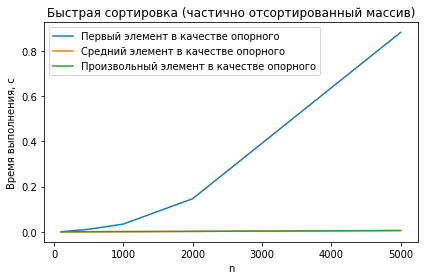

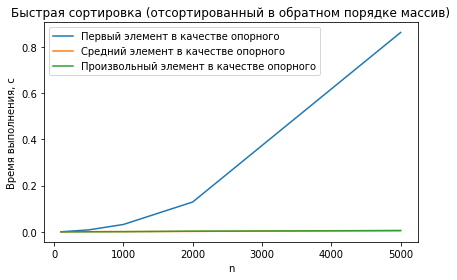

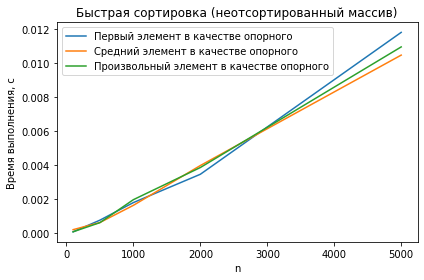

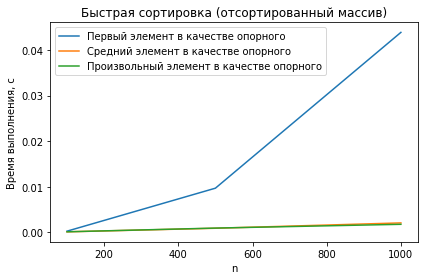

In [20]:
util.plot_quick_sort_results(
    ('Первый элемент в качестве опорного', quick_sort_first),
    ('Средний элемент в качестве опорного', quick_sort_middle),
    ('Произвольный элемент в качестве опорного', quick_sort_random)
)

**Вопрос**: какую асимптотическую сложность имеют эти реализации на разных входных данных? Чем это объясняется?

### Задание №4: сортировка слиянием

Напишите реализацию сортировки слиянием:

In [21]:
def merge(a, left_index, right_index, middle):
    left = a[left_index:middle + 1]
    right = a[middle + 1:right_index + 1]
    i = j = 0
    k = left_index
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            a[k] = left[i]
            i += 1
        else:
            a[k] = right[j]
            j += 1
        k += 1
    while i < len(left):
        a[k] = left[i]
        i += 1
        k += 1
    while j < len(right):
        a[k] = right[j]
        j += 1
        k += 1

def merge_sort(a, left_index=None, right_index=None):
    if left_index is None:
        left_index = 0
    if right_index is None:
        right_index = len(a) - 1
    if left_index >= right_index:
        return
    middle = (left_index + right_index) // 2
    merge_sort(a, left_index, middle)
    merge_sort(a, middle + 1, right_index)
    merge(a, left_index, right_index, middle)


Проверьте корректность реализации:

In [22]:
a = [5, 4, 3, 2, 1]
merge_sort(a)
assert util.is_sorted(a)

А теперь сравним скорость работы трёх написанных нами алгоритмов:

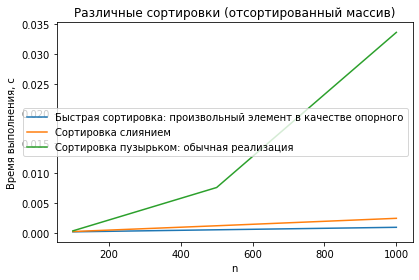

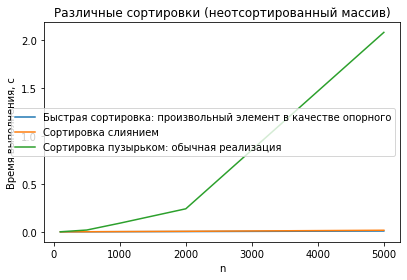

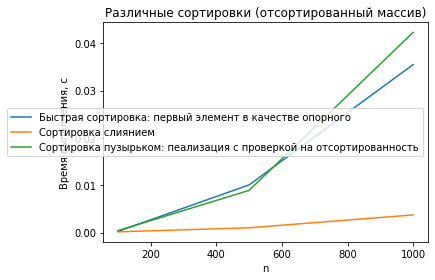

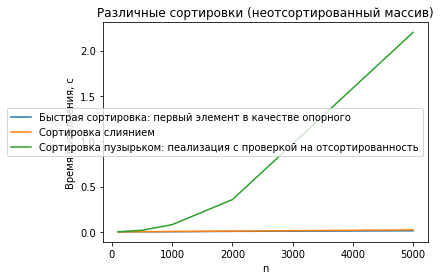

In [23]:
util.plot_sort_results(
    ('Быстрая сортировка: произвольный элемент в качестве опорного', quick_sort_random),
    ('Сортировка слиянием', merge_sort),
    ('Сортировка пузырьком: обычная реализация', bubble_sort),
)
util.plot_sort_results(
    ('Быстрая сортировка: первый элемент в качестве опорного', quick_sort_first),
    ('Сортировка слиянием', merge_sort),
    ('Сортировка пузырьком: пеализация с проверкой на отсортированность', bubble_sort),
)

**Вопрос**: какие выводы можно сделать из полученных результатов? В чём принципиальное отличие сортировки слиянием от двух других рассмотренных?

# Поиск элемента

Теперь перейдём к алгоритмам поиска элемента в массиве.

### Задание №5: линейный поиск

Для начала напишите самую простую реализацию поиска — линейный поиск элемента в массиве:

In [24]:
def search(a, x):
    for i in range(len(a)):
        if a[i] == x:
            return i

Проверьте корректность реализации:

In [25]:
assert search([1, 2, 3, 4, 5], 5)  == 4
assert search([1, 2, 3, 4, 5], 3)  == 2

Когда нам ничего не известно о данных, которые находятся в массиве, придумать какой-то более эффективный алгоритм достаточно сложно. Но если мы знаем какую-то дополнительную информацию о природе данных в массиве, то можно написать более эффективные алгоритмы.

### Задание №6: двоичный поиск

Если массив упорядочен, то для такого массива можно написать эффективный алгоритм поиска — двоичный (или *бинарный*) поиск. Напишите реализацию этого алгоритма:

In [26]:
def binary_search(a, x):
    low = 0
    high = len(a) - 1
    while low <= high:
        mid = (low + high) // 2
        guess = a[mid]
        if guess == x:
            return mid
        elif guess > x:
            high = mid - 1
        else:
            low = mid + 1

Проверьте корректность реализации:

In [27]:
assert binary_search([1, 2, 3, 4, 5], 5)  == 4
assert binary_search([1, 2, 3, 4, 5], 3)  == 2
assert binary_search([1, 2, 3, 4, 5], 1)  == 0

### Задание №7: интерполяционный поиск

Если кроме упорядоченности про массив известно, как именно возрастают (убывают) в нём элементы, то алгоритм двоичного поиска можно существенно улучшить. Вместо деления отрезка пополам можно выполнить интерполяцию и получить приблизительное положение элемента в массиве. Такая модификация будет называться *интерполяционным поиском*. Напишите реализацию алгоритма интерполяционного поиска, предполагая, что элементы в массиве возрастают линейно:

In [28]:
def interpolation_search(a, x):
    left = 0
    right = len(a) - 1
    while a[left] <= x and a[right] >= x:
        i = (x - a[left]) * (left - right) // (a[left] - a[right]) + left
        if a[i] == x:
            return i
        elif a[i] > x:
            right = i - 1
        else:
            left = i + 1


Проверьте свою реализацию:

In [29]:
assert interpolation_search([1, 2, 3, 4, 5], 5)  == 4
assert interpolation_search([1, 2, 3, 4, 5], 3)  == 2
assert interpolation_search([1, 2, 3, 4, 5], 1)  == 0

Сравните скорость работы трёх алгоритмов поиска на разных входных данных:

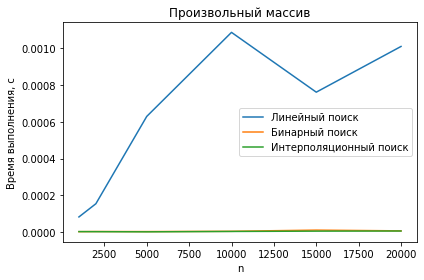

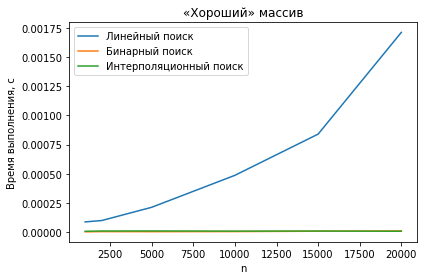

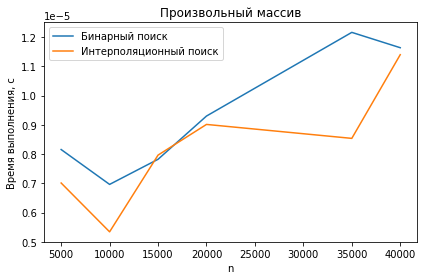

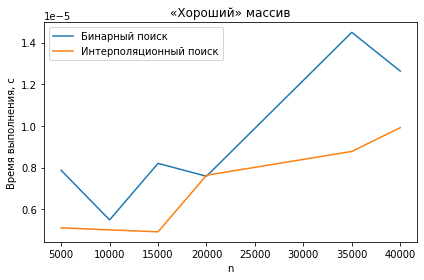

In [30]:
util.plot_search_results_small(
    ('Линейный поиск', search),
    ('Бинарный поиск', binary_search),
    ('Интерполяционный поиск', interpolation_search),
)
util.plot_search_results_huge(
    ('Бинарный поиск', binary_search),
    ('Интерполяционный поиск', interpolation_search),
)

**Вопрос**: что можно сказать об алгоритме интерполяционного поиска? Когда имеет смысл его применять?

## Дополнительное задание

Если у вас осталось время, то напишите реализацию сортировки слияением с разбиением исходного массива на 3 части. Сравните скорость работы двух реализаций.

In [31]:
import random

def merge(a, b):
    i = j = 0
    C = []
    while i < len(a) and j < len(b):
        if a[i] <= b[j]:
            C.append(a[i])
            i += 1
        else:
            C.append(b[j])
            j += 1
    return C + a[i:] + b[j:]

def merge_sort(a):
    if len(a) <= 1:
        return a
    middle = len(a) // 3
    left = merge_sort(a[:middle])
    mid = merge_sort(a[middle:middle * 2])
    right = merge_sort(a[middle * 2:])
    return merge(merge(left, mid), right)

a = [random.randint(0, 99) for i in range(9)]
print(merge_sort(a))

[14, 19, 35, 42, 49, 53, 57, 63, 77]
